In [1]:
from core.engine import *
import numpy as np
from graphviz import Digraph
import torch

In [2]:
np.random.seed(0)

X = Tensor(np.random.randn(2, 2), label='X')
print('X', X)
print()

W = Tensor(np.random.randn(1, 2), label='W')
print('W', W)
print()

B = Tensor(np.random.randn(1, 1), label='B')
print('B', B)
print()

WX = W @ X; WX.label = 'W @ X'

N = WX + B; N.label = 'W @ X + B'
print('N', N)
print()

L = N.tanh(); L.label = 'L'
print('L', L)

X Tensor(data=[[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]])

W Tensor(data=[[ 1.86755799 -0.97727788]])

B Tensor(data=[[0.95008842]])

N Tensor(data=[[ 3.28805949 -0.49257015]])

L Tensor(data=[[ 0.99721738 -0.45625394]])


In [3]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.children:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "%s | %s | %s" % (n.label, n, n.grad), shape='record')
        if n.op:
            dot.node(name=str(id(n)) + n.op, label=n.op)
            dot.edge(str(id(n)) + n.op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)

    return dot

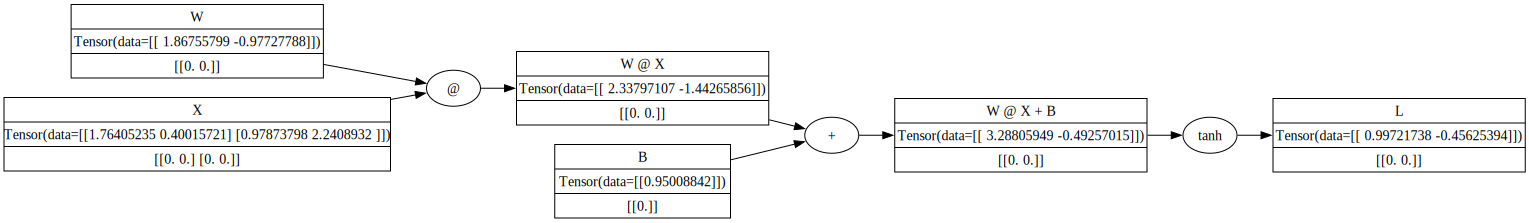

In [4]:
draw_dot(L)

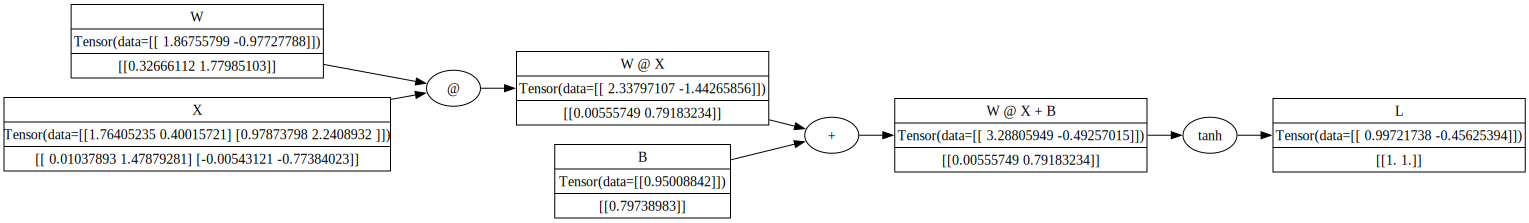

In [5]:
L.backward()
draw_dot(L)

In [6]:
np.random.seed(0)

X_PT = torch.tensor(np.random.randn(2, 2), requires_grad=True)
X_PT.retain_grad()
print('X', X_PT)
print()

W_PT = torch.tensor(np.random.randn(1, 2), requires_grad=True)
W_PT.retain_grad()
print('W', W_PT)
print()

B_PT = torch.tensor(np.random.randn(1, 1), requires_grad=True)
B_PT.retain_grad()
print('B', B_PT)
print()

WX_PT = W_PT @ X_PT;
print('WX_PT', WX_PT)
print()

N_PT = WX_PT + B_PT;
print('N', N_PT)
print()

L_PT= N_PT.tanh(); L_PT.retain_grad()
print('L', L_PT)

X tensor([[1.7641, 0.4002],
        [0.9787, 2.2409]], dtype=torch.float64, requires_grad=True)

W tensor([[ 1.8676, -0.9773]], dtype=torch.float64, requires_grad=True)

B tensor([[0.9501]], dtype=torch.float64, requires_grad=True)

WX_PT tensor([[ 2.3380, -1.4427]], dtype=torch.float64, grad_fn=<MmBackward0>)

N tensor([[ 3.2881, -0.4926]], dtype=torch.float64, grad_fn=<AddBackward0>)

L tensor([[ 0.9972, -0.4563]], dtype=torch.float64, grad_fn=<TanhBackward0>)


In [7]:
L_PT.backward(torch.ones_like(L_PT), retain_graph=True)

print(W_PT.grad)
print(B_PT.grad)

print(torch.allclose(W_PT.grad, torch.from_numpy(W.grad)))
print(torch.allclose(B_PT.grad, torch.from_numpy(B.grad)))

tensor([[0.3267, 1.7799]], dtype=torch.float64)
tensor([[0.7974]], dtype=torch.float64)
True
True
